In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
#import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
#reading the dataset
df=pd.read_csv('concrete.csv')
df


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [2]:
#PRE‌PROCESSING
#checking null 
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [3]:
#delete duplicated rows
df=df.drop_duplicates()
df



,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<Axes: >

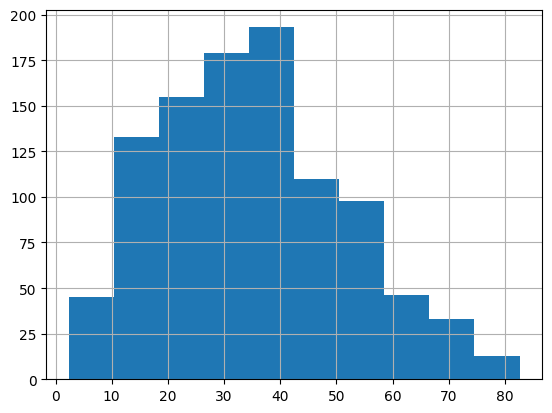

In [4]:
#creating hisogarm chart for target variable distribution
df['Strength'].hist()

In [5]:
#Recognize Outliers:

# Cement
Q1 = df['Cement'].quantile(q=0.25)
Q3 = df['Cement'].quantile(q=0.75)
print('1st quantile: ' , Q1 )
print('3rd quantile: ' , Q3 )
print('IQR: ' , stats.iqr(df['Cement']))

1st quantile:  190.7
3rd quantile:  349.0
IQR:  158.3


In [6]:
L_outlier = Q1-1.5*(Q3-Q1)
U_outlier = Q3+1.5*(Q3-Q1)
print('Lower outlier limit in cement: ', L_outlier)
print('Upper outlier limit in cement: ', U_outlier)

Lower outlier limit in cement:  -46.75000000000003
Upper outlier limit in cement:  586.45


In [7]:
print('Number of outlier in cement Upper: ',df[df['Cement']>586.4375]['Cement'].count())
print('Number of outlier in cement Lower: ',df[df['Cement']<-44.0625]['Cement'].count())

Number of outlier in cement Upper:  0
Number of outlier in cement Lower:  0


In [8]:
#Blast Furnace Slag
S_Q1 = df['Blast Furnace Slag'].quantile(q=0.25)
S_Q3 = df['Blast Furnace Slag'].quantile(q=0.75)
LS_outliers = S_Q1-1.5*(S_Q3-S_Q1)
US_outliers = S_Q3+1.5*(S_Q3-S_Q1)
print('Number of outlier in cement Upper: ',df[df['Blast Furnace Slag']>357.375]['Blast Furnace Slag'].count())
print('Number of outlier in cement Lower: ',df[df['Blast Furnace Slag']<-214.425]['Blast Furnace Slag'].count())

Number of outlier in cement Upper:  2
Number of outlier in cement Lower:  0


In [9]:
#FLY‌ASH
As_Q1 = df['Fly Ash'].quantile(q=0.25)
As_Q3 = df['Fly Ash'].quantile(q=0.75)
LAs_outliers = As_Q1-1.5*(As_Q3-As_Q1)
UAs_outliers = As_Q3+1.5*(As_Q3-As_Q1)
print('Number of outlier in ash Upper: ',df[df['Fly Ash']>295.75]['Fly Ash'].count())
print('Number of outlier in ash Lower: ',df[df['Fly Ash']<-177.45]['Fly Ash'].count())

Number of outlier in ash Upper:  0
Number of outlier in ash Lower:  0


In [10]:
#Water
W_Q1 = df['Water'].quantile(q=0.25)
W_Q3 = df['Water'].quantile(q=0.75)
WL_outlier = W_Q1-1.5*(W_Q3-W_Q1)
WU_outlier = W_Q3+1.5*(W_Q3-W_Q1)
print('Number of outlier in cement Upper: ',df[df['Water']>232.65]['Water'].count())
print('Number of outlier in cement Lower: ',df[df['Water']<124.25]['Water'].count())

Number of outlier in cement Upper:  4
Number of outlier in cement Lower:  5


In [11]:
#Superplasticizer
SP_Q1 = df['Superplasticizer'].quantile(q=0.25)
SP_Q3 = df['Superplasticizer'].quantile(q=0.75)
stats.iqr(df['Superplasticizer'])
SPL_outliers = SP_Q1-1.5*(SP_Q3-SP_Q1)
SPU_outliers = S_Q3+1.5*(SP_Q3-SP_Q1)
print('Number of outlier in cement Upper: ',df[df['Superplasticizer']>158.25]['Superplasticizer'].count())
print('Number of outlier in cement Lower: ',df[df['Superplasticizer']<-15.99]['Superplasticizer'].count())

Number of outlier in cement Upper:  0
Number of outlier in cement Lower:  0


In [12]:
#Coarse Aggregate
CA_Q1 = df['Coarse Aggregate'].quantile(q=0.25)
CA_Q3 = df['Coarse Aggregate'].quantile(q=0.75)
stats.iqr(df['Coarse Aggregate'])
CAL_outliers = CA_Q1-1.5*(CA_Q3-CA_Q1)
CAU_outliers = CA_Q3+1.5*(CA_Q3-CA_Q1)
print('Number of outlier in cement Upper: ',df[df['Coarse Aggregate']>1175.5]['Coarse Aggregate'].count())
print('Number of outlier in cement Lower: ',df[df['Coarse Aggregate']<785.89]['Coarse Aggregate'].count())


Number of outlier in cement Upper:  0
Number of outlier in cement Lower:  0


In [13]:
#Fine Aggregate 
FA_Q1 = df['Fine Aggregate'].quantile(q=0.25)
FA_Q3 = df['Fine Aggregate'].quantile(q=0.75)
stats.iqr(df['Fine Aggregate'])
FAL_outliers = FA_Q1-1.5*(FA_Q3-FA_Q1)
FAU_outliers = FA_Q3+1.5*(FA_Q3-FA_Q1)
print('Number of outlier in cement Upper: ',df[df['Fine Aggregate']>963.574]['Fine Aggregate'].count())
print('Number of outlier in cement Lower: ',df[df['Fine Aggregate']<591.37]['Fine Aggregate'].count())



Number of outlier in cement Upper:  5
Number of outlier in cement Lower:  0


In [14]:
# Age 
A_Q1 = df['Age'].quantile(q=0.25)
A_Q3 = df['Age'].quantile(q=0.75)
LA_outliers = A_Q1-1.5*(A_Q3-A_Q1)
UA_outliers = A_Q3+1.5*(A_Q3-A_Q1)
print('Number of outlier in age Upper: ',df[df['Age']>129.5]['Age'].count())
print('Number of outlier in age Lower: ',df[df['Age']<-66.5]['Age'].count())

Number of outlier in age Upper:  59
Number of outlier in age Lower:  0


In [15]:
for cols in df.columns[:-1]:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    iqr = Q3-Q1
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    df.loc[(df[cols]<low) | (df[cols]>high), cols] = df[cols].median()

In [16]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,71.368060,55.536318,182.521990,5.793433,974.376816,771.630547,32.117413,35.250378
std,104.344261,85.239998,64.207969,20.113739,5.397369,77.579667,78.821883,27.665333,16.284815
min,102.000000,0.000000,0.000000,127.300000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,168.000000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,141.300000,118.300000,192.000000,9.900000,1031.000000,822.000000,28.000000,44.870000
max,540.000000,342.100000,200.100000,228.000000,23.400000,1145.000000,945.000000,120.000000,82.600000


<Axes: >

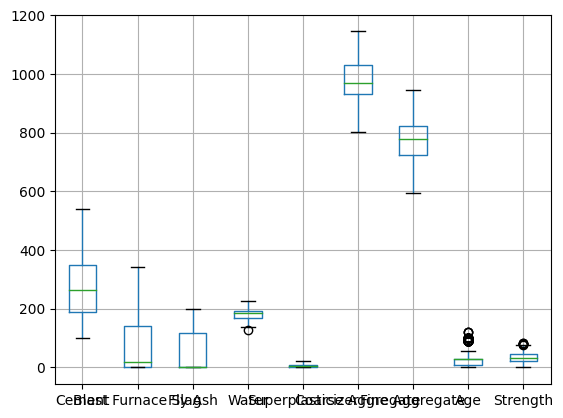

In [17]:
df.boxplot()

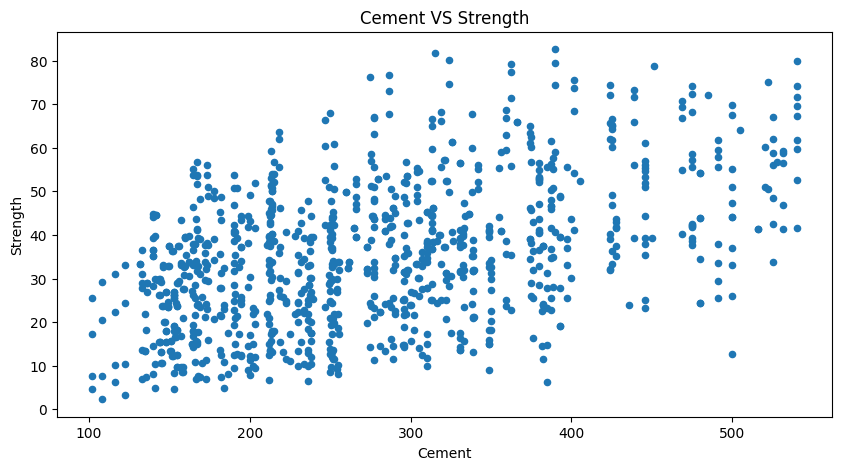

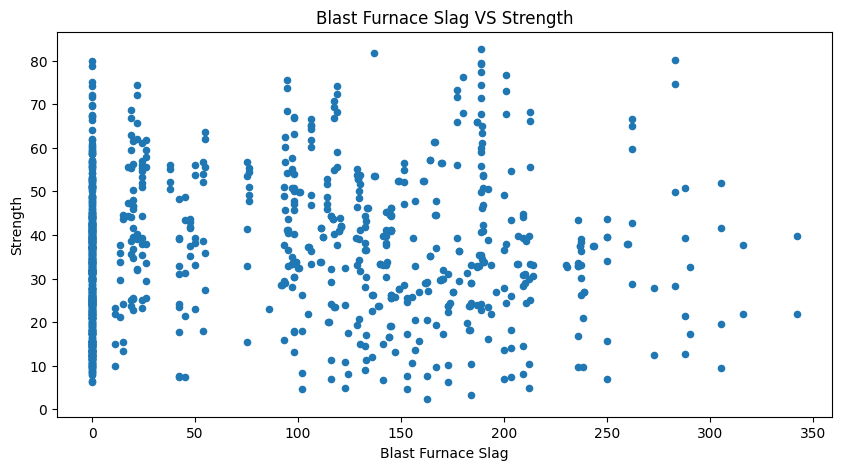

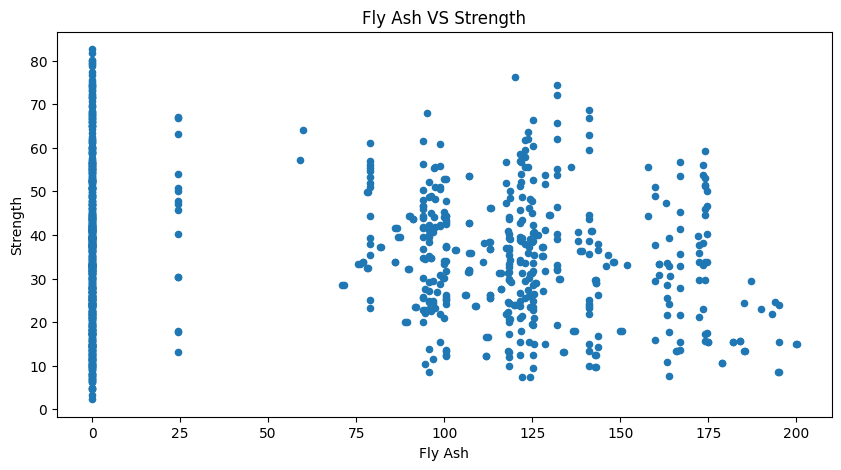

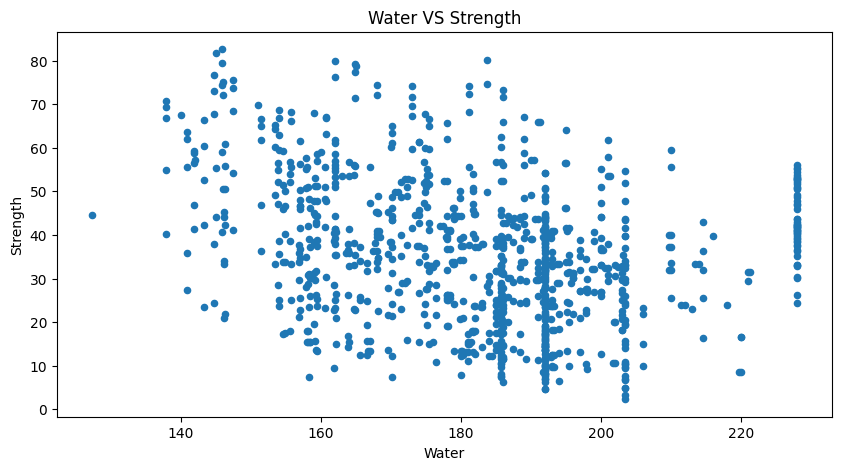

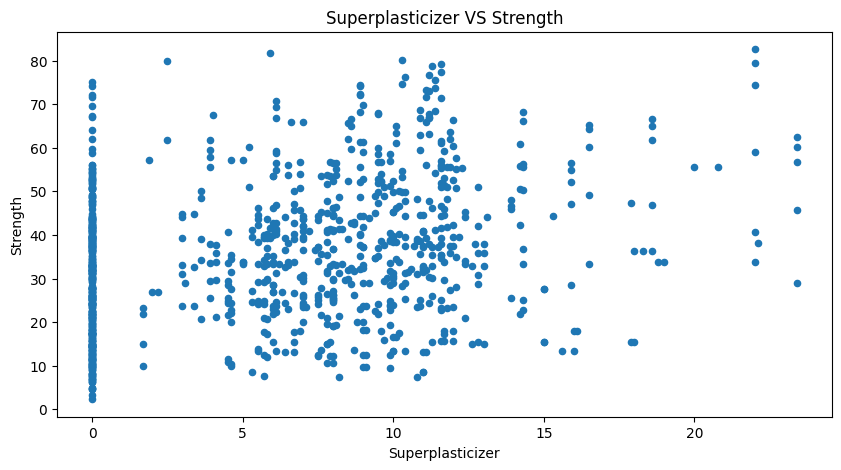

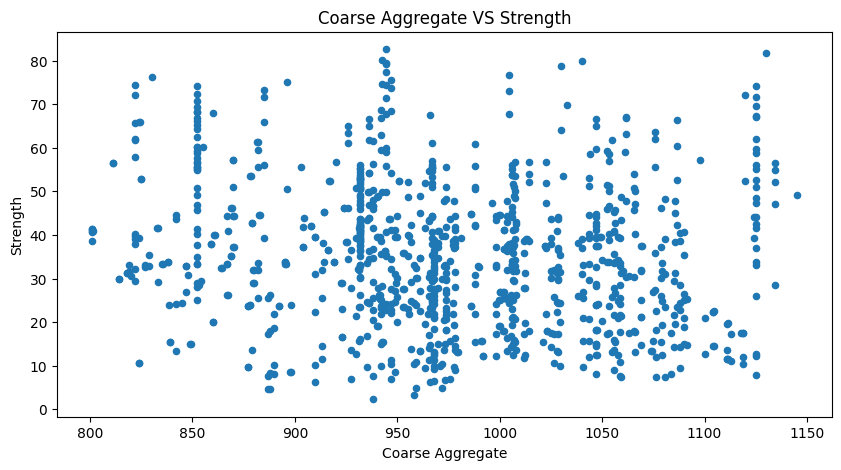

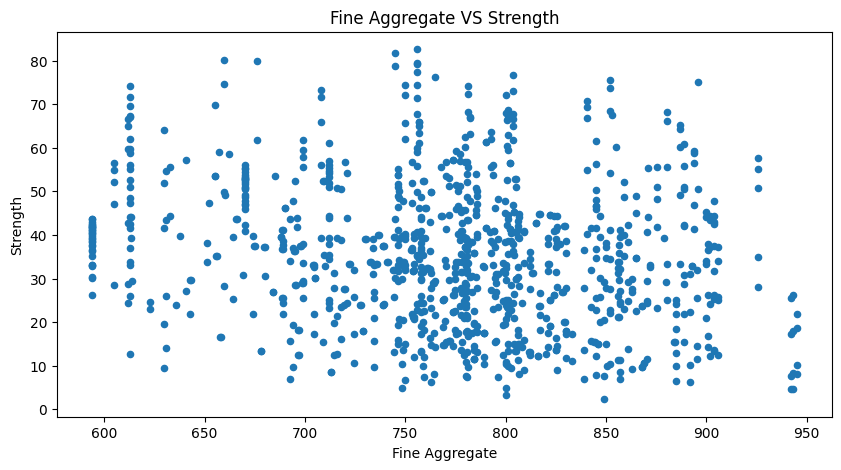

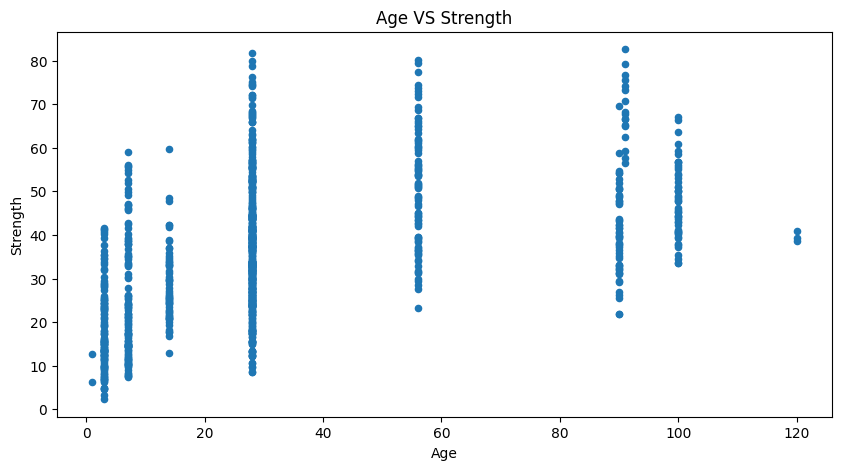

In [18]:
ContinuousCols=['Cement', 'Blast Furnace Slag', 'Fly Ash',
                'Water', 'Superplasticizer','Coarse Aggregate', 
                           'Fine Aggregate', 'Age']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='Strength', figsize=(10,5), title=predictor+" VS "+ 'Strength')

In [19]:
ContinuousCols=[ 'Strength','Cement', 'Blast Furnace Slag', 'Fly Ash',
                'Water', 'Superplasticizer','Coarse Aggregate', 
                           'Fine Aggregate', 'Age']
CorrelationData=df[ContinuousCols].corr()
CorrelationData


,Strength,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
Strength,1.000000,0.488283,0.105877,-0.080648,-0.278499,0.318721,-0.144717,-0.202883,0.498530
Cement,0.488283,1.000000,-0.303669,-0.385610,-0.053217,-0.026511,-0.086205,-0.262508,-0.038201
Blast Furnace Slag,0.105877,-0.303669,1.000000,-0.308903,0.132249,0.034945,-0.277239,-0.291118,-0.035485
Fly Ash,-0.080648,-0.385610,-0.308903,1.000000,-0.296261,0.492786,-0.026468,0.103619,0.063818
Water,-0.278499,-0.053217,0.132249,-0.296261,1.000000,-0.610666,-0.213945,-0.425633,-0.034910
Superplasticizer,0.318721,-0.026511,0.034945,0.492786,-0.610666,1.000000,-0.195028,0.136685,0.057438
Coarse Aggregate,-0.144717,-0.086205,-0.277239,-0.026468,-0.213945,-0.195028,1.000000,-0.144140,0.022952
Fine Aggregate,-0.202883,-0.262508,-0.291118,0.103619,-0.425633,0.136685,-0.144140,1.000000,0.051224
Age,0.498530,-0.038201,-0.035485,0.063818,-0.034910,0.057438,0.022952,0.051224,1.000000


In [45]:
CorrelationData['Strength'][abs(CorrelationData['Strength']) > 0.2 ]

Strength            1.000000
Cement              0.488283
Water              -0.278499
Superplasticizer    0.318721
Fine Aggregate     -0.202883
Age                 0.498530
Name: Strength, dtype: float64

In [34]:
SelectedColumns=['Cement','Superplasticizer','Age','Water','Fine Aggregate','Strength']
dff=df[SelectedColumns]
dff.head(10)

,Cement,Superplasticizer,Age,Water,Fine Aggregate,Strength
0,540.0,2.5,28,162.0,676.0,79.99
1,540.0,2.5,28,162.0,676.0,61.89
2,332.5,0.0,28,228.0,594.0,40.27
3,332.5,0.0,28,228.0,594.0,41.05
4,198.6,0.0,28,192.0,825.5,44.30
5,266.0,0.0,90,228.0,670.0,47.03
6,380.0,0.0,28,228.0,594.0,43.70
7,380.0,0.0,28,228.0,594.0,36.45
8,266.0,0.0,28,228.0,670.0,45.85
9,475.0,0.0,28,228.0,594.0,39.29


In [35]:
#split target and predictors:
x = dff.iloc[:,0:5] 
y = dff.iloc[:,5:] 
x.head(10)


,Cement,Superplasticizer,Age,Water,Fine Aggregate
0,540.0,2.5,28,162.0,676.0
1,540.0,2.5,28,162.0,676.0
2,332.5,0.0,28,228.0,594.0
3,332.5,0.0,28,228.0,594.0
4,198.6,0.0,28,192.0,825.5
5,266.0,0.0,90,228.0,670.0
6,380.0,0.0,28,228.0,594.0
7,380.0,0.0,28,228.0,594.0
8,266.0,0.0,28,228.0,670.0
9,475.0,0.0,28,228.0,594.0


In [36]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100)

In [37]:
r_model = RandomForestRegressor()
r_model.fit(x_train,y_train)


/tmp/ipykernel_7235/1766761074.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_model.fit(x_train,y_train)


RandomForestRegressor()

In [38]:
y_pred = r_model.predict(x_test)


In [47]:
r_model.score(x_train,y_train)


0.9737527270035498

In [40]:
r_model.score(x_test,y_test)


0.8935754524836306

In [41]:

metrics.mean_squared_error(y_test,y_pred)

28.67553985115111

In [42]:

r_squared = r2_score(y_test, y_pred)
r_squared


0.8935754524836306

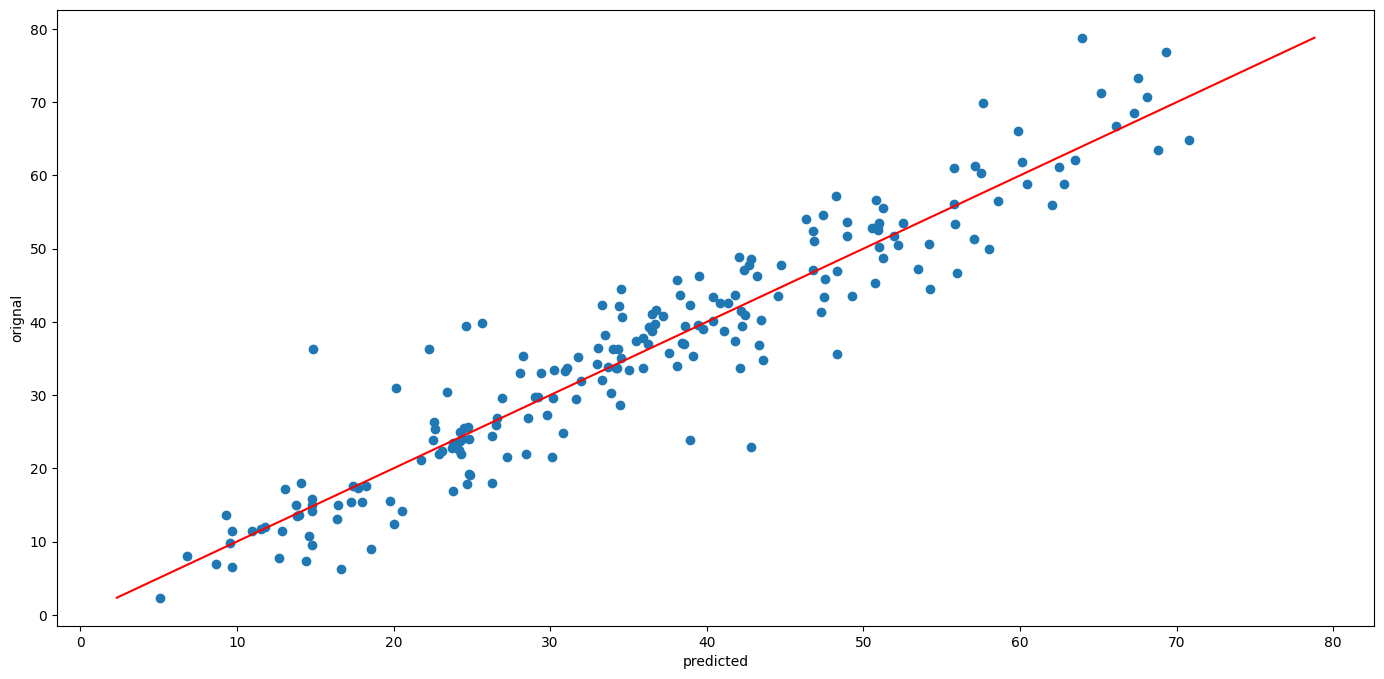

In [43]:
plt.figure(figsize=[17,8])
plt.scatter(y_pred,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()